In [ ]:
from sklearn.preprocessing import StandardScaler

# Padroniza as variáveis preditoras com StandardScaler e mantém a coluna 'Decisao'
def ajustar_scaler(tabela_original):
    scaler = StandardScaler()
    tabela_aux = tabela_original.drop('Decisao', axis=1)
    tabela_aux = pd.DataFrame(scaler.fit_transform(tabela_aux), tabela_aux.index, tabela_aux.columns)
    tabela_aux['Decisao'] = tabela_original['Decisao']
    return tabela_aux

# Padroniza a base de dados
nova_base_dados = ajustar_scaler(base_dados)

# Garante que 'Decisao' está na lista e reorganiza a base
top10.append('Decisao')
nova_base_dados = nova_base_dados[top10].reset_index(drop=True)

# Exibe a base ajustada
display(nova_base_dados)

,Fornecedores,Outros Ativos Circulantes,Obrigações Fiscais,Tributos Diferidos,Ativo Total,Lucros/Prejuízos Acumulados,Obrigações Sociais e Trabalhistas,Outros_1,Ativo Realizável a Longo Prazo,Imobilizado,Decisao
0,-0.531190,-0.034210,-0.041367,-0.432272,0.499598,0.191517,1.648954,-0.033023,-0.045796,-0.069395,2
1,-0.249374,-0.032003,-0.067857,1.267826,-0.028104,0.093727,0.096516,-0.039755,-0.021653,-0.036300,0
2,0.500854,-0.034086,-0.008351,0.672518,0.011142,0.113773,0.070572,-0.028826,0.267073,-0.031142,2
3,0.204035,-0.029530,-0.048043,0.390489,-0.033094,-0.460858,-1.194287,0.016501,-0.131289,0.007145,2
4,-0.135962,-0.032009,-0.019543,0.169604,0.034053,0.191517,2.224769,-0.032319,0.013334,-0.032086,2
...,...,...,...,...,...,...,...,...,...,...,...
1877,0.083221,-0.032460,-0.007143,-0.127195,-0.006847,0.193485,-0.165250,-0.028563,0.244543,-0.060671,2
1878,-0.239035,-0.034553,-0.057758,-0.103531,0.004879,-0.460858,-0.165250,-0.030438,-0.798868,0.807061,2
1879,0.064808,-0.033009,-0.093800,-0.182251,-0.043717,0.191517,-0.165250,-0.031247,1.132649,0.035322,2
1880,-0.154485,-0.032469,-0.040604,-0.111939,0.010402,-0.460858,-0.165250,-0.028992,0.134873,-0.023233,0


In [ ]:
from sklearn.model_selection import train_test_split

# Separa as variáveis preditoras (x) e a variável alvo (y)
x = nova_base_dados.drop('Decisao', axis=1)
y = nova_base_dados['Decisao']

# Divide os dados em treino (70%) e teste (30%)
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=1)

Dummy
              precision    recall  f1-score   support

           0       0.47      0.55      0.51       264
           2       0.54      0.46      0.50       301

    accuracy                           0.50       565
   macro avg       0.50      0.50      0.50       565
weighted avg       0.51      0.50      0.50       565



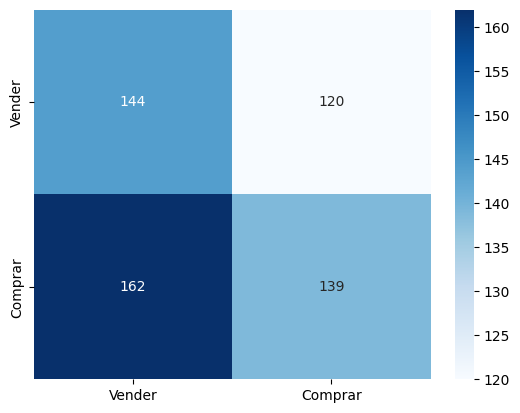

######################################################################


In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Criação e treinamento de um modelo Dummy como baseline
dummy = DummyClassifier(strategy='stratified', random_state=2)
dummy.fit(x_treino, y_treino)
previsao_dummy = dummy.predict(x_teste)

# Função para avaliação de modelos com relatório de classificação e matriz de confusão
def avaliar(y_teste, previsoes, nome_modelo):
    print(nome_modelo)
    report = classification_report(y_teste, previsoes)
    print(report)
    cf_matrix = pd.DataFrame(confusion_matrix(y_teste, previsoes), index=['Vender', 'Comprar'], columns=['Vender', 'Comprar'])
    sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt=',')
    plt.show()
    print('#' * 70)

# Avaliação do modelo Dummy
avaliar(y_teste, previsao_dummy, 'Dummy')

In [ ]:
# Importação dos principais modelos de machine learning para classificação
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Dicionário com os modelos de classificação a serem testados
modelos = {
    "AdaBoost": AdaBoostClassifier(random_state=1),
    "DecisionTree": DecisionTreeClassifier(random_state=1),
    "RandomForest": RandomForestClassifier(random_state=1),
    "ExtraTree": ExtraTreesClassifier(random_state=1),
    "GradientBoost": GradientBoostingClassifier(random_state=1),
    "KNN": KNeighborsClassifier(),
    "LogisticRegression": LogisticRegression(random_state=1),
    "NaiveBayes": GaussianNB(),
    "SVM": SVC(random_state=1),
    "RedeNeural": MLPClassifier(random_state=1, max_iter=400),
}

AdaBoost
              precision    recall  f1-score   support

           0       0.52      0.55      0.53       264
           2       0.58      0.56      0.57       301

    accuracy                           0.55       565
   macro avg       0.55      0.55      0.55       565
weighted avg       0.55      0.55      0.55       565



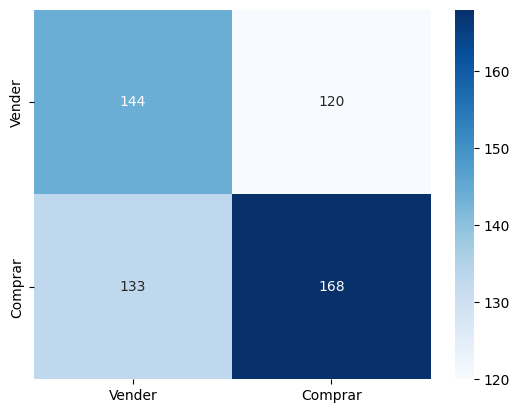

######################################################################
DecisionTree
              precision    recall  f1-score   support

           0       0.51      0.52      0.51       264
           2       0.57      0.56      0.56       301

    accuracy                           0.54       565
   macro avg       0.54      0.54      0.54       565
weighted avg       0.54      0.54      0.54       565



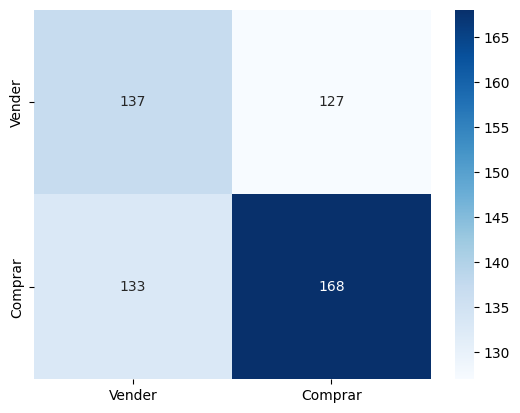

######################################################################
RandomForest
              precision    recall  f1-score   support

           0       0.52      0.65      0.58       264
           2       0.61      0.48      0.53       301

    accuracy                           0.56       565
   macro avg       0.56      0.56      0.55       565
weighted avg       0.57      0.56      0.55       565



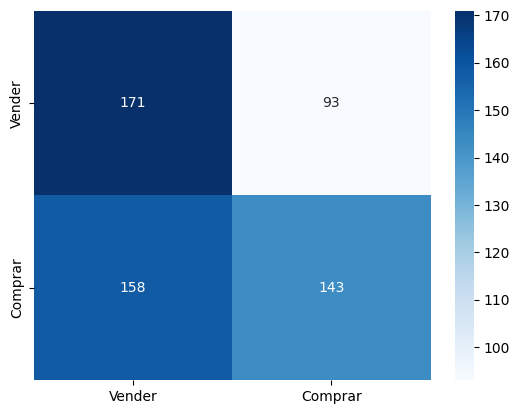

######################################################################
ExtraTree
              precision    recall  f1-score   support

           0       0.49      0.60      0.54       264
           2       0.56      0.45      0.50       301

    accuracy                           0.52       565
   macro avg       0.52      0.52      0.52       565
weighted avg       0.53      0.52      0.52       565



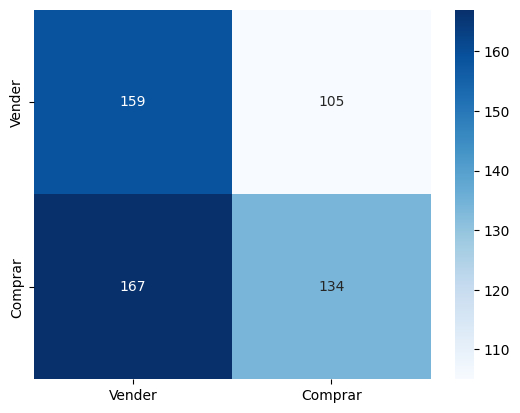

######################################################################
GradientBoost
              precision    recall  f1-score   support

           0       0.50      0.61      0.55       264
           2       0.58      0.47      0.52       301

    accuracy                           0.53       565
   macro avg       0.54      0.54      0.53       565
weighted avg       0.54      0.53      0.53       565



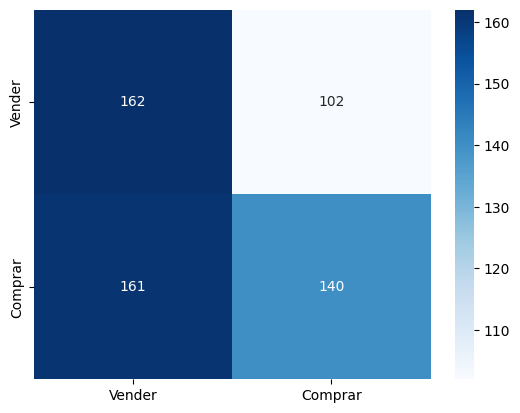

######################################################################
KNN
              precision    recall  f1-score   support

           0       0.46      0.48      0.47       264
           2       0.52      0.50      0.51       301

    accuracy                           0.49       565
   macro avg       0.49      0.49      0.49       565
weighted avg       0.49      0.49      0.49       565



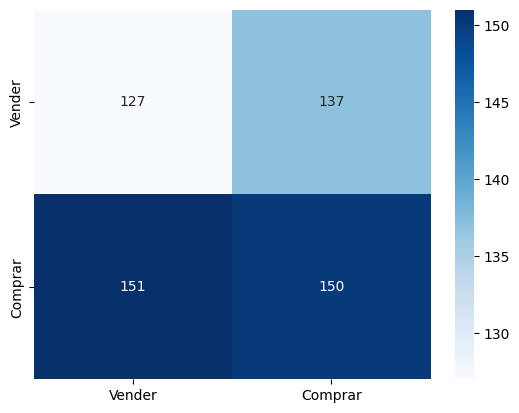

######################################################################
LogisticRegression
              precision    recall  f1-score   support

           0       0.48      0.89      0.63       264
           2       0.62      0.15      0.25       301

    accuracy                           0.50       565
   macro avg       0.55      0.52      0.44       565
weighted avg       0.56      0.50      0.42       565



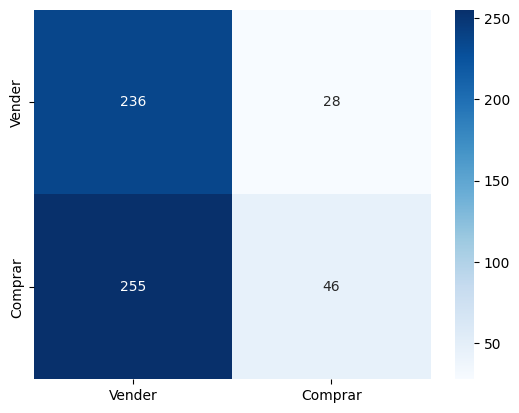

######################################################################
NaiveBayes
              precision    recall  f1-score   support

           0       0.46      0.95      0.62       264
           2       0.40      0.03      0.05       301

    accuracy                           0.46       565
   macro avg       0.43      0.49      0.34       565
weighted avg       0.43      0.46      0.32       565



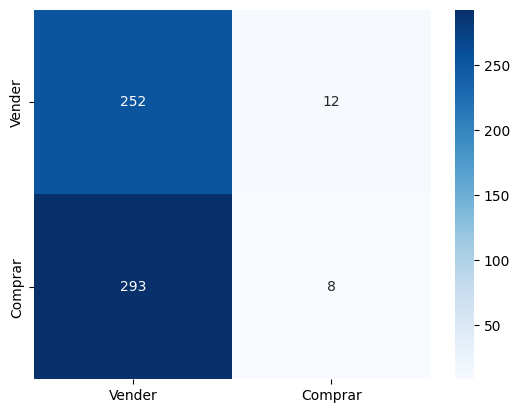

######################################################################
SVM
              precision    recall  f1-score   support

           0       0.47      0.92      0.62       264
           2       0.58      0.10      0.18       301

    accuracy                           0.48       565
   macro avg       0.53      0.51      0.40       565
weighted avg       0.53      0.48      0.38       565



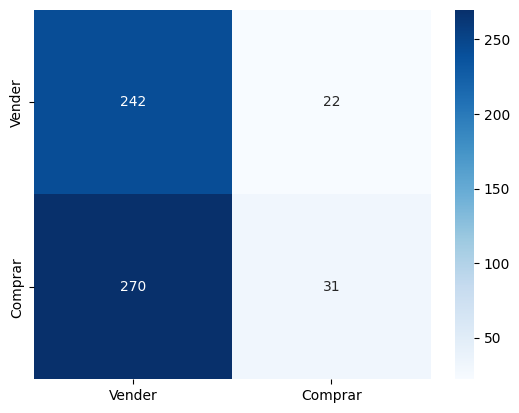

######################################################################
RedeNeural
              precision    recall  f1-score   support

           0       0.48      0.61      0.54       264
           2       0.56      0.44      0.49       301

    accuracy                           0.52       565
   macro avg       0.52      0.52      0.51       565
weighted avg       0.52      0.52      0.51       565



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.



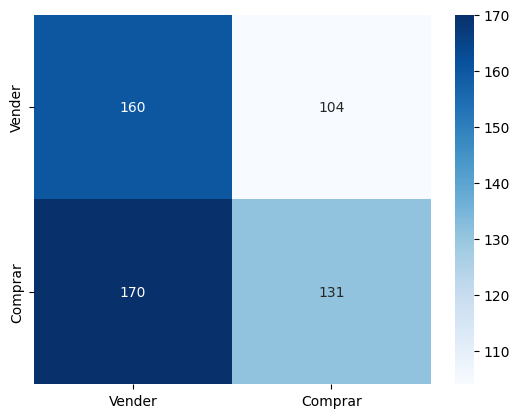

######################################################################


In [ ]:
# Treinamento e avaliação de cada modelo
for nome_modelo in modelos:
    modelo = modelos[nome_modelo]

    # Treina o modelo com os dados de treino
    modelo.fit(x_treino, y_treino)

    # Realiza previsões com os dados de teste
    previsoes = modelo.predict(x_teste)

    # Avalia a performance do modelo
    avaliar(y_teste, previsoes, nome_modelo)

    # Atualiza o dicionário com o modelo treinado
    modelos[nome_modelo] = modelo

In [ ]:
# Configura e executa o GridSearchCV para otimização de hiperparâmetros do RandomForest

# Define o modelo base
modelo_final = modelos['RandomForest']

# Define a grade de parâmetros para busca
n_estimators = range(10, 251, 30)
max_features = list(range(2, 11, 2))
max_features.append('auto')
min_samples_split = range(2, 11, 2)

# Define a métrica de avaliação com foco na classe '2'
precision2_score = make_scorer(precision_score, labels=[2], average='macro')

# Configura o GridSearchCV
grid = GridSearchCV(
      estimator=RandomForestClassifier(),
      param_grid={
          'n_estimators': n_estimators,
          'max_features': max_features,
          'min_samples_split': min_samples_split,
          'random_state': [1],
      },
      scoring=precision2_score,
)

# Executa o ajuste de hiperparâmetros
resultado_grid = grid.fit(x_treino, y_treino)
print('Ajuste feito')

A saída de streaming foi truncada nas últimas 5000 linhas.


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 380, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-pack

Ajuste feito


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning:


225 fits failed out of a total of 1350.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
225 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/ut

RandomForest Tunado
              precision    recall  f1-score   support

           0       0.49      0.65      0.56       264
           2       0.57      0.40      0.47       301

    accuracy                           0.52       565
   macro avg       0.53      0.53      0.51       565
weighted avg       0.53      0.52      0.51       565



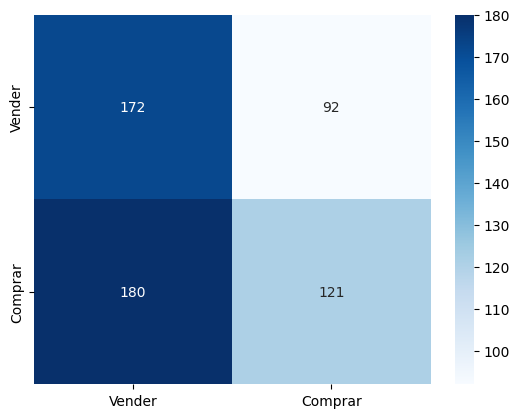

######################################################################


In [ ]:
# Obtém o melhor modelo encontrado pelo GridSearchCV
modelo_tunado = resultado_grid.best_estimator_

# Realiza previsões com o modelo ajustado
previsoes = modelo_tunado.predict(x_teste)

# Avalia o desempenho do modelo tunado
avaliar(y_teste, previsoes, 'RandomForest Tunado')

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning:

One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan na

Melhores parâmetros encontrados:
{'class_weight': 'balanced', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 1}
RandomForest Tunado v2
              precision    recall  f1-score   support

           0       0.53      0.60      0.56       264
           2       0.60      0.53      0.56       301

    accuracy                           0.56       565
   macro avg       0.56      0.56      0.56       565
weighted avg       0.57      0.56      0.56       565



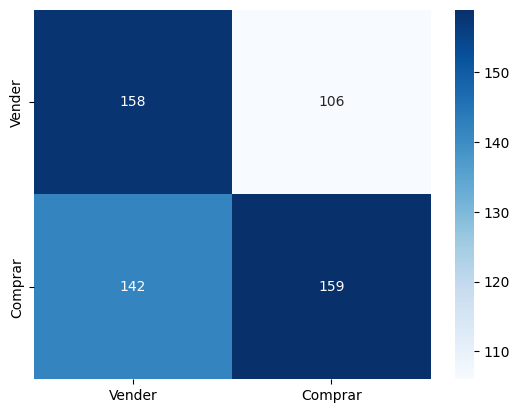

######################################################################


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, precision_score
from imblearn.over_sampling import SMOTE

# Balanceamento opcional com SMOTE
smote = SMOTE(random_state=1)
x_res, y_res = smote.fit_resample(x_treino, y_treino)

# Scorer focado na classe 2
precision2_score = make_scorer(precision_score, labels=[2], average='macro')

# Parâmetros expandidos para tuning
param_grid = {
    'n_estimators': [100, 150, 200, 250],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced'],
    'random_state': [1],
}

# Validação estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# GridSearch
grid = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=param_grid,
    scoring=precision2_score,
    cv=cv,
    n_jobs=-1,  # usa todos os núcleos disponíveis
    verbose=2
)

# Treinamento com dados balanceados
grid.fit(x_res, y_res)

# Melhor modelo encontrado
melhor_modelo = grid.best_estimator_
print("Melhores parâmetros encontrados:")
print(grid.best_params_)

# Avaliação no conjunto de teste original
previsoes = melhor_modelo.predict(x_teste)
avaliar(y_teste, previsoes, "RandomForest Tunado v2")
